In [1]:
import json
import requests
import ast

import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../data/processed/redirects_new.tsv', sep='\t')
df = df[df.url.notna()]
df

url  head_final_code  \
0                              http://sidc.be/silso/home            200.0   
1                                       https://bmrb.io/            200.0   
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...            200.0   
3                         https://www.cpc.ncep.noaa.gov/            200.0   
4      http://cosmos.bot.kyoto-u.ac.jp/acytodb//cgi-b...            404.0   
...                                                  ...              ...   
13352    http://radar.brookes.ac.uk/radar/access/home.do            200.0   
13353                   http://www.ub.uni-siegen.de/opus            200.0   
13354  http://numerique.bibliotheque.toulouse.fr/cgi-...              NaN   
13355                    https://www.utas.edu.au/library            200.0   
13356                 http://204.232.200.153:8080/jspui/              NaN   

                                                head_url  \
0                         https://www.sidc.be/silso/home   
1                                       https://bmrb.io/   
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...   
3                         https://www.cpc.ncep.noaa.gov/   
4      http://cosmos.bot.kyoto-u.ac.jp/acytodb//cgi-b...   
...                                                  ...   
13352          https://radar.brookes.ac.uk/radar/home.do   
13353                 https://www.ub.uni-siegen.de/opus/   
13354                                                NaN   
13355                    https://www.utas.edu.au/library   
13356                                                NaN   

                                              head_chain       head_codes  \
0                          ['http://sidc.be/silso/home']            [302]   
1                                                     []               []   
2      ['http://www.pac.dfo-mpo.gc.ca/science/oceans/...            [307]   
3                                                     []               []   
4                                                     []               []   
...                                                  ...              ...   
13352  ['http://radar.brookes.ac.uk/radar/access/home...  [302, 302, 302]   
13353  ['http://www.ub.uni-siegen.de/opus', 'https://...       [301, 301]   
13354                                                NaN              NaN   
13355                                                 []               []   
13356                                                NaN              NaN   

       head_elapsed                                         head_error  \
0          0.151548                                                NaN   
1          0.527131                                                NaN   
2          0.530466                                                NaN   
3          0.507708                                                NaN   
4          0.586088                                                NaN   
...             ...                                                ...   
13352      0.082406                                                NaN   
13353      0.056328                                                NaN   
13354           NaN  HTTPConnectionPool(host='numerique.bibliothequ...   
13355      0.223856                                                NaN   
13356           NaN  HTTPConnectionPool(host='204.232.200.153', por...   

       get_final_code                                            get_url  \
0               200.0                     https://www.sidc.be/silso/home   
1               200.0                                   https://bmrb.io/   
2               200.0  https://www.pac.dfo-mpo.gc.ca/science/oceans/d...   
3               200.0                     https://www.cpc.ncep.noaa.gov/   
4               404.0  http://cosmos.bot.kyoto-u.ac.jp/acytodb//cgi-b...   
...               ...                                                ...   
13352           200.0          https://radar.brookes.ac.uk/ra

In [3]:
df.describe(include='all')

url  head_final_code  \
count                       13356     10926.000000   
unique                      13356              NaN   
top     http://sidc.be/silso/home              NaN   
freq                            1              NaN   
mean                          NaN       218.406736   
std                           NaN        61.035428   
min                           NaN       200.000000   
25%                           NaN       200.000000   
50%                           NaN       200.000000   
75%                           NaN       200.000000   
max                           NaN       504.000000   

                                                 head_url head_chain  \
count                                               10926      10926   
unique                                               9331       4056   
top     https://www.unit.no/ugyldig-lenke-til-dokument...         []   
freq                                                   16       6596   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

       head_codes  head_elapsed  \
count       10926  10926.000000   
unique         59           NaN   
top            []           NaN   
freq         6596           NaN   
mean          NaN      1.124777   
std           NaN      3.103610   
min           NaN      0.013261   
25%           NaN      0.276535   
50%           NaN      0.583665   
75%           NaN      1.059370   
max           NaN     61.235589   

                                               head_error  get_final_code  \
count                                                2430     10954.00000   
unique                                               2299             NaN   
top     ('Connection aborted.', RemoteDisconnected('Re...             NaN   
freq                                                   34             NaN   
mean                                                  NaN       215.73407   
std                                                   NaN        56.89142   
min                                                   NaN       200.00000   
25%                                                   NaN       200.00000   
50%                                                   NaN       200.00000   
75%                                                   NaN       200.00000   
max                                                   NaN       504.00000   

                                                  get_url get_chain get_codes  \
count                                               10954     10954     10954   
unique                                               9353      4082        57   
top     https://www.unit.no/ugyldig-lenke-til-dokument...        []        []   
freq                                                   16      6595      6595   
mean                                                  NaN       NaN       NaN   
std                                                   NaN       NaN       NaN   
min                                                   NaN       NaN       NaN   
25%                                                   NaN       NaN       NaN   
50%                                                   NaN       NaN       NaN   
75%                                                   NaN       NaN       NaN   
max                                                   NaN       NaN       NaN   

         get_elapsed                                          get_error  
count   10954.000000                                               2402  
unique           NaN                             

# Final status codes

### HEAD

In [4]:
df[['url', 'head_final_code']].groupby('head_final_code').count()

url
head_final_code      
200.0            9976
201.0              19
400.0              19
401.0              14
403.0             205
404.0             489
405.0              50
406.0              20
410.0              15
412.0               1
419.0               1
429.0               1
444.0               1
500.0              47
501.0               3
502.0              15
503.0              49
504.0               1

In [5]:
final_head = df[['url', 'head_final_code']]
final_head['class'] = final_head.head_final_code.floordiv(100).mul(100)
final_head.groupby('class').count()

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_16494/3455765756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_head['class'] = final_head.head_final_code.floordiv(100).mul(100)


url  head_final_code
class                       
200.0  9995             9995
400.0   816              816
500.0   115              115

In [6]:
final_head.groupby('class').count().sum()

url                10926
head_final_code    10926
dtype: int64

In [7]:
final_head.groupby('class').count().div(df.shape[0]).mul(100)

url  head_final_code
class                            
200.0  74.835280        74.835280
400.0   6.109614         6.109614
500.0   0.861036         0.861036

### GET

In [8]:
df[['url', 'get_final_code']].groupby('get_final_code').count()

url
get_final_code       
200.0           10139
201.0              19
400.0               8
401.0              13
403.0             168
404.0             464
405.0               1
406.0              21
410.0              15
412.0               1
419.0               1
429.0               1
444.0               1
500.0              40
502.0              13
503.0              48
504.0               1

In [9]:
final_get = df[['url', 'get_final_code']]
final_get['class'] = final_get.get_final_code.floordiv(100).mul(100)
final_get.groupby('class').count()

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_16494/1946842175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_get['class'] = final_get.get_final_code.floordiv(100).mul(100)


url  get_final_code
class                       
200.0  10158           10158
400.0    694             694
500.0    102             102

In [10]:
final_get.groupby('class').count().sum()

url               10954
get_final_code    10954
dtype: int64

In [11]:
final_get.groupby('class').count().div(df.shape[0]).mul(100)

url  get_final_code
class                           
200.0  76.055705       76.055705
400.0   5.196167        5.196167
500.0   0.763702        0.763702

### Errors

In [12]:
head_errors = df[df.head_error.notna()][['url','head_error']]
get_errors = df[df.get_error.notna()][['url','get_error']]

In [13]:
head_errors[head_errors.head_error.str.contains('Max')]

url  \
10                                   https://isoarch.eu/   
13                        https://www.chinare.org.cn/en/   
26                               http://www.flyrnai.org/   
71               http://alternaria.vbi.vt.edu/index.html   
83                                http://www.pazar.info/   
...                                                  ...   
13344          http://intranet.thomasdanby.ac.uk/dspace/   
13345           http://dspace.dgsca.unam.mx:8080/dspace/   
13347                  https://library.for.nau.edu:8443/   
13354  http://numerique.bibliotheque.toulouse.fr/cgi-...   
13356                 http://204.232.200.153:8080/jspui/   

                                              head_error  
10     HTTPSConnectionPool(host='isoarch.eu', port=44...  
13     HTTPSConnectionPool(host='www.chinare.org.cn',...  
26     HTTPSConnectionPool(host='www.flyrnai.org', po...  
71     HTTPConnectionPool(host='alternaria.vbi.vt.edu...  
83     HTTPConnectionPool(host='www.pazar.info', port...  
...                                                  ...  
13344  HTTPConnectionPool(host='intranet.thomasdanby....  
13345  HTTPConnectionPool(host='dspace.dgsca.unam.mx'...  
13347  HTTPSConnectionPool(host='library.for.nau.edu'...  
13354  HTTPConnectionPool(host='numerique.bibliothequ...  
13356  HTTPConnectionPool(host='204.232.200.153', por...  

[2242 rows x 2 columns]

In [14]:
get_errors[get_errors.get_error.str.contains('Max')]

url  \
10                                   https://isoarch.eu/   
13                        https://www.chinare.org.cn/en/   
26                               http://www.flyrnai.org/   
57                                 http://stellabase.org   
71               http://alternaria.vbi.vt.edu/index.html   
...                                                  ...   
13344          http://intranet.thomasdanby.ac.uk/dspace/   
13345           http://dspace.dgsca.unam.mx:8080/dspace/   
13347                  https://library.for.nau.edu:8443/   
13354  http://numerique.bibliotheque.toulouse.fr/cgi-...   
13356                 http://204.232.200.153:8080/jspui/   

                                               get_error  
10     HTTPSConnectionPool(host='isoarch.eu', port=44...  
13     HTTPSConnectionPool(host='www.chinare.org.cn',...  
26     HTTPSConnectionPool(host='www.flyrnai.org', po...  
57     HTTPConnectionPool(host='cnidarians.bu.edu', p...  
71     HTTPConnectionPool(host='alternaria.vbi.vt.edu...  
...                                                  ...  
13344  HTTPConnectionPool(host='intranet.thomasdanby....  
13345  HTTPConnectionPool(host='dspace.dgsca.unam.mx'...  
13347  HTTPSConnectionPool(host='library.for.nau.edu'...  
13354  HTTPConnectionPool(host='numerique.bibliothequ...  
13356  HTTPConnectionPool(host='204.232.200.153', por...  

[2256 rows x 2 columns]

In [15]:
head_errors[head_errors.head_error.str.contains('30 redirect')]

url  \
485                       https://idr.openmicroscopy.org   
1191                             http://hgtree.snu.ac.kr   
1462                               http://cfgp.snu.ac.kr   
2526            https://incois.gov.in/tropflux/index.jsp   
2550                         https://odis.incois.gov.in/   
3872   https://www.projectdatasphere.org/projectdatas...   
6141                  http://repository.poligran.edu.co/   
10841                         http://library.wur.nl/way/   

                   head_error  
485    Exceeded 30 redirects.  
1191   Exceeded 30 redirects.  
1462   Exceeded 30 redirects.  
2526   Exceeded 30 redirects.  
2550   Exceeded 30 redirects.  
3872   Exceeded 30 redirects.  
6141   Exceeded 30 redirects.  
10841  Exceeded 30 redirects.

In [16]:
get_errors[get_errors.get_error.str.contains('30 redirect')]

url               get_error
6141  http://repository.poligran.edu.co/  Exceeded 30 redirects.

Testing Ukranian repositories

In [17]:
get_errors[get_errors.url.str.contains('(\.ua$)|(\.ua/)', regex=True)]

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_16494/1742693288.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  get_errors[get_errors.url.str.contains('(\.ua$)|(\.ua/)', regex=True)]


url  \
4892                    http://eprints.isofts.kiev.ua/   
4943           http://www.library.ukma.kiev.ua/dspace/   
4983             http://repository.ibss.org.ua/dspace/   
5147     http://www.rarelib.undp.org.ua/eng/index.php3   
5817                       http://openarchive.nure.ua/   
5827                  http://dspace.uabs.edu.ua/jspui/   
6135                        http://kgmtu.edu.ua/jspui/   
6231                        http://dspace.uccu.org.ua/   
6474                    http://repo.uipa.edu.ua/jspui/   
7067                      http://ir.asta.edu.ua/jspui/   
7490                        http://dspace.hnpu.edu.ua/   
7989                http://repository.mdu.in.ua/jspui/   
8085                         http://elar.tsatu.edu.ua/   
8105                        http://dspace.zsea.edu.ua/   
8197              http://dspace.knau.kharkov.ua/jspui/   
8199                           http://rep.btsau.edu.ua   
8206                       https://biblio.onat.edu.ua/   
8419                            https://rep.ksma.ks.ua   
10016                 http://eprints.ksame.kharkov.ua/   
10107                       http://dspace.uabs.edu.ua/   
10799             http://repository.ibss.org.ua/dspace   
10906                         http://repo.sau.sumy.ua/   
10976      http://www.dspace.humanities.org.ua/dspace/   
11616               http:// visnykagro.knau.kharkov.ua   
11803                     http://repository.mdu.in.ua/   
11831                            http://sj-dstu.dp.ua/   
12107  http://www.hups.mil.gov.ua/periodic-app/journal   
12746                     http://www.e-archive.org.ua/   
12753                 http://library.khnu.km.ua/jspui/   
12916                  http://dspace.ukrfa.kharkov.ua/   
12922                   http://dspace.ukrfa.kharkov.ua   
12970                             http://evrica.org.ua   
12992                   http://dspace.academy.sumy.ua/   
13017            http://open-archive.kture.kharkov.ua/   
13034                        http://dspace.onu.edu.ua/   
13052              http://open-arhive.kture.kharkov.ua   

                                               get_error  
4892   ('Connection aborted.', ConnectionResetError(5...  
4943   HTTPConnectionPool(host='www.library.ukma.kiev...  
4983   HTTPConnectionPool(host='repository.ibss.org.u...  
5147   HTTPConnectionPool(host='www.rarelib.undp.org....  
5817   HTTPSConnectionPool(host='openarchive.nure.ua'...  
5827   HTTPConnectionPool(host='dspace.uabs.edu.ua', ...  
6135   HTTPConnectionPool(host='kgmtu.edu.ua', port=8...  
6231   HTTPConnectionPool(host='dspace.uccu.org.ua', ...  
6474   HTTPConnectionPool(host='repo.uipa.edu.ua', po...  
7067   HTTPConnectionPool(host='ir.asta.edu.ua', port...  
7490   HTTPConnectionPool(host='dspace.hnpu.edu.ua', ...  
7989   HTTPConnectionPool(host='repository.mdu.in.ua'...  
8085   HTTPConnectionPool(host='elar.tsatu.edu.ua', p...  
8105   HTTPSConnectionPool(host='dspace.znu.edu.ua', ...  
8197   HTTPConnectionPool(host='dspace.knau.kharkov.u...  
8199   HTTPConnectionPool(host='rep.btsau.edu.ua', po...  
8206   HTTPSConnectionPool(host='biblio.onat.edu.ua',...  
8419   HTTPSConnectionPool(host='rep.ksma.ks.ua', por...  
10016  HTTPConnectionPool(host='eprints.ksame.kharkov...  
10107  HTTPConnectionPool(host='dspace.uabs.edu.ua', ...  
10799  HTTPConnectionPool(host='repository.ibss.org.u...  
10906  HTTPConnectionPool(host='repo.sau.sumy.ua', po...  
10976  HTTPConnectionPool(host='www.dspace.humanities...  
11616  HTTPConnectionPool(host='%20visnykagro.knau.kh...  
11803  HTTPConnectionPool(host='repository.mdu.in.ua'...  
11831  HTTPConnectionPool(host='sj-dstu.dp.ua', port=...  
12107  HTTPConnectionPool(host='www.hups.mil.gov.ua',...  
12746  HTTPConnectionPool(host='www.e-archive.org.ua'...  
12753  HTTPConnectionPool(host='library.khnu.km.ua', ...  
12916  HTTPConnectionPool(host='dspace.ukrfa.kharkov....  
12922  HTTPConnectionPool(host='dspace.ukrfa.kharkov....  
12970  HTTPConne

In [18]:
get_errors[get_errors.url.str.contains('(\.ua$)|(\.ua/)', regex=True)].count()

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_16494/2005047697.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  get_errors[get_errors.url.str.contains('(\.ua$)|(\.ua/)', regex=True)].count()


url          36
get_error    36
dtype: int64

In [19]:
df[df.url.str.contains('(\.ua$)|(\.ua/)', regex=True)]

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_16494/2148841299.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df.url.str.contains('(\.ua$)|(\.ua/)', regex=True)]


url  head_final_code  \
2185   http://inform.ikd.kiev.ua/index.php?path=/en/i...            200.0   
2286                                  http://wdc.org.ua/            200.0   
4892                      http://eprints.isofts.kiev.ua/              NaN   
4943             http://www.library.ukma.kiev.ua/dspace/              NaN   
4950                http://www.dspace.ucu.edu.ua/dspace/            403.0   
...                                                  ...              ...   
13015                              http://ir.kneu.edu.ua            200.0   
13017              http://open-archive.kture.kharkov.ua/              NaN   
13034                          http://dspace.onu.edu.ua/              NaN   
13052                http://open-arhive.kture.kharkov.ua              NaN   
13248                      http://www.ekmair.ukma.edu.ua            200.0   

                                        head_url  \
2185   http://inform.ikd.kiev.ua/?path=/en/index   
2286                          http://wdc.org.ua/   
4892                                         NaN   
4943                                         NaN   
4950        http://www.dspace.ucu.edu.ua/dspace/   
...                                          ...   
13015                     http://ir.kneu.edu.ua/   
13017                                        NaN   
13034                                        NaN   
13052                                        NaN   
13248                 http://ekmair.ukma.edu.ua/   

                                              head_chain head_codes  \
2185   ['http://inform.ikd.kiev.ua/index.php?path=/en...      [301]   
2286                                                  []         []   
4892                                                 NaN        NaN   
4943                                                 NaN        NaN   
4950                                                  []         []   
...                                                  ...        ...   
13015                                                 []         []   
13017                                                NaN        NaN   
13034                                                NaN        NaN   
13052                                                NaN        NaN   
13248                 ['http://www.ekmair.ukma.edu.ua/']      [301]   

       head_elapsed                                         head_error  \
2185       0.402488                                                NaN   
2286       0.905063                                                NaN   
4892            NaN  ('Connection aborted.', ConnectionResetError(5...   
4943            NaN  HTTPConnectionPool(host='www.library.ukma.kiev...   
4950       0.073373                                                NaN   
...             ...                                                ...   
13015      1.609602                                                NaN   
13017           NaN  HTTPConnectionPool(host='open-archive.kture.kh...   
13034           NaN  HTTPConnectionPool(host='192.168.30.200', port...   
13052           NaN  HTTPConnectionPool(host='open-arhive.kture.kha...   
13248      0.661039                                                NaN   

       get_final_code                                    get_url  \
2185            200.0  http://inform.ikd.kiev.ua/?path=/en/index   
2286            200.0                         http://wdc.org.ua/   
4892              NaN                                        NaN   
4943              NaN                                        NaN   
4950            403.0       http://www.dspace.ucu.edu.ua/dspace/   
...               ...                                        ...   
13015           200.0                     http://ir.kneu.edu.ua/   
13017             NaN                                        NaN   
13034             NaN                                        NaN   
13052             NaN                                        NaN   
13248        

### Redirects

In [20]:
head_chains = df[df.head_codes.notna()][['url', 'head_url', 'head_final_code', 'head_codes']]
head_chains['len'] = head_chains.head_codes.apply(ast.literal_eval).str.len()
head_chains.groupby('len').count()


url  head_url  head_final_code  head_codes
len                                             
0    6596      6596             6596        6596
1    3364      3364             3364        3364
2     686       686              686         686
3     233       233              233         233
4      37        37               37          37
5      10        10               10          10

In [21]:
get_chains = df[df.get_codes.notna()][['url', 'get_url', 'get_final_code', 'get_codes']]
get_chains['len'] = get_chains.get_codes.apply(ast.literal_eval).str.len()
get_chains.groupby('len').count()

url  get_url  get_final_code  get_codes
len                                          
0    6595     6595            6595       6595
1    3376     3376            3376       3376
2     699      699             699        699
3     229      229             229        229
4      43       43              43         43
5      12       12              12         12

<AxesSubplot:xlabel='# redirects'>

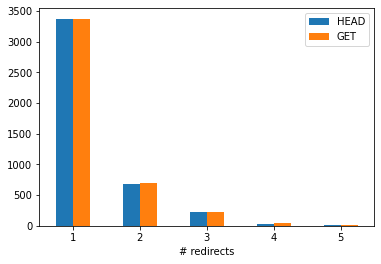

In [22]:
data = head_chains.groupby('len').count().join(get_chains.groupby('len').count(), lsuffix='_head', rsuffix='_get')
data.index.rename('# redirects', inplace=True)
data.rename(columns={'url_head': 'HEAD', 'url_get': 'GET'}, inplace=True)
data[['HEAD', 'GET']][1:].plot.bar(rot=0)

In [23]:
data[['HEAD', 'GET']][1:].sum()

HEAD    4330
GET     4359
dtype: int64

In [24]:
data[['HEAD', 'GET']][1:].sum().div(df.shape[0]).mul(100)

HEAD    32.419886
GET     32.637017
dtype: float64

In [25]:
head_chains['class'] = head_chains.head_final_code.floordiv(100).mul(100)
head_chains[(head_chains.len > 0) & (head_chains['class'] != 200)]

url  \
11                  http://epi.minsal.cl/bases-de-datos/   
84                          https://protocols.io/welcome   
177           http://agris.fao.org/agris-search/index.do   
228                        http://oryzatagline.cirad.fr/   
243                   http://www.ncbi.nlm.nih.gov/unists   
...                                                  ...   
13262                         http://www.kumc.edu/archie   
13320               http://trinity.cdmhost.com/index.php   
13340  http://calvados.c3sl.ufpr.br/ojs2/index.php/ve...   
13346       http://www4.furg.br/ojs/biblos/ojs/index.php   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   

                                                head_url  head_final_code  \
11                  http://epi.minsal.cl/bases-de-datos/            403.0   
84                  https://www.protocols.io:443/welcome            400.0   
177      https://agris.fao.org:443/agris-search/index.do            404.0   
228                       https://oryzatagline.cirad.fr/            403.0   
243                  https://www.ncbi.nlm.nih.gov/unists            410.0   
...                                                  ...              ...   
13262                        https://www.kumc.edu/archie            404.0   
13320  https://www.oclc.org/url/?404;http://trinity.c...            404.0   
13340  https://revistas.ufpr.br/index.php/veterinary/...            404.0   
13346  https://sistemas.furg.br/ojs/biblos/ojs/index.php            404.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html            404.0   

      head_codes  len  class  
11         [302]    1  400.0  
84         [301]    1  400.0  
177        [301]    1  400.0  
228        [301]    1  400.0  
243        [301]    1  400.0  
...          ...  ...    ...  
13262      [302]    1  400.0  
13320      [302]    1  400.0  
13340      [301]    1  400.0  
13346      [302]    1  400.0  
13348      [302]    1  400.0  

[378 rows x 6 columns]

In [26]:
head_chains[(head_chains.len > 0) & (head_chains['class'] != 200)].groupby('class').count()

url  head_url  head_final_code  head_codes  len
class                                                 
400.0  338       338              338         338  338
500.0   40        40               40          40   40

In [27]:
get_chains['class'] = get_chains.get_final_code.floordiv(100).mul(100)
get_chains[(get_chains.len > 0) & (get_chains['class'] != 200)]

url  \
11                  http://epi.minsal.cl/bases-de-datos/   
177           http://agris.fao.org/agris-search/index.do   
228                        http://oryzatagline.cirad.fr/   
243                   http://www.ncbi.nlm.nih.gov/unists   
288         http://www.ncbi.nlm.nih.gov/dbSTS/index.html   
...                                                  ...   
13262                         http://www.kumc.edu/archie   
13320               http://trinity.cdmhost.com/index.php   
13340  http://calvados.c3sl.ufpr.br/ojs2/index.php/ve...   
13346       http://www4.furg.br/ojs/biblos/ojs/index.php   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   

                                                 get_url  get_final_code  \
11                  http://epi.minsal.cl/bases-de-datos/           403.0   
177      https://agris.fao.org:443/agris-search/index.do           404.0   
228                       https://oryzatagline.cirad.fr/           403.0   
243                  https://www.ncbi.nlm.nih.gov/unists           410.0   
288        https://www.ncbi.nlm.nih.gov/dbSTS/index.html           403.0   
...                                                  ...             ...   
13262                        https://www.kumc.edu/archie           404.0   
13320                  https://www.oclc.org/url/notfound           404.0   
13340  https://revistas.ufpr.br/index.php/veterinary/...           404.0   
13346  https://sistemas.furg.br/ojs/biblos/ojs/index.php           404.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html           404.0   

        get_codes  len  class  
11          [302]    1  400.0  
177         [301]    1  400.0  
228         [301]    1  400.0  
243         [301]    1  400.0  
288         [301]    1  400.0  
...           ...  ...    ...  
13262       [302]    1  400.0  
13320  [302, 302]    2  400.0  
13340       [301]    1  400.0  
13346       [302]    1  400.0  
13348       [302]    1  400.0  

[344 rows x 6 columns]

In [28]:
get_chains[(get_chains.len > 0) & (get_chains['class'] != 200)].groupby('class').count()

url  get_url  get_final_code  get_codes  len
class                                              
400.0  307      307             307        307  307
500.0   37       37              37         37   37

### Redirect reason

In [36]:
head_chains[head_chains.len == 1]

url  \
0                              http://sidc.be/silso/home   
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...   
6                                  http://ipt.taibif.tw/   
9                                http://arabidopsis.info   
11                  http://epi.minsal.cl/bases-de-datos/   
...                                                  ...   
13341  http://calvados.c3sl.ufpr.br/ojs2/index.php/acta/   
13346       http://www4.furg.br/ojs/biblos/ojs/index.php   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   
13350                      http://cloud.ncl.edu.tw/chna/   
13351                      http://www.myopenarchive.org/   

                                                head_url  head_final_code  \
0                         https://www.sidc.be/silso/home            200.0   
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...            200.0   
6                                 https://ipt.taibif.tw/            200.0   
9                              https://arabidopsis.info/            200.0   
11                  http://epi.minsal.cl/bases-de-datos/            403.0   
...                                                  ...              ...   
13341           https://revistas.ufpr.br/index.php/acta/            200.0   
13346  https://sistemas.furg.br/ojs/biblos/ojs/index.php            404.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html            404.0   
13350                     https://cloud.ncl.edu.tw/chna/            200.0   
13351                     https://www.myopenarchive.org/            200.0   

      head_codes  len  class  
0          [302]    1  200.0  
2          [307]    1  200.0  
6          [301]    1  200.0  
9          [301]    1  200.0  
11         [302]    1  400.0  
...          ...  ...    ...  
13341      [301]    1  200.0  
13346      [302]    1  400.0  
13348      [302]    1  400.0  
13350      [302]    1  200.0  
13351      [301]    1  200.0  

[3364 rows x 6 columns]

In [50]:
head_chains[(head_chains.len == 1) & (head_chains.url.str.replace('http://', 'https://') == head_chains.head_url)]

url  \
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...   
6                                  http://ipt.taibif.tw/   
27             http://www.hgvd.genome.med.kyoto-u.ac.jp/   
30              http://archive.researchdata.leeds.ac.uk/   
33                    http://biodb.swu.edu.cn/qprimerdb/   
...                                                  ...   
13288                http://dspace.sunyconnect.suny.edu/   
13295                         http://scholar.google.com/   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   
13350                      http://cloud.ncl.edu.tw/chna/   
13351                      http://www.myopenarchive.org/   

                                                head_url  head_final_code  \
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...            200.0   
6                                 https://ipt.taibif.tw/            200.0   
27            https://www.hgvd.genome.med.kyoto-u.ac.jp/            200.0   
30             https://archive.researchdata.leeds.ac.uk/            200.0   
33                   https://biodb.swu.edu.cn/qprimerdb/            200.0   
...                                                  ...              ...   
13288               https://dspace.sunyconnect.suny.edu/            200.0   
13295                        https://scholar.google.com/            200.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html            404.0   
13350                     https://cloud.ncl.edu.tw/chna/            200.0   
13351                     https://www.myopenarchive.org/            200.0   

      head_codes  len  class  
2          [307]    1  200.0  
6          [301]    1  200.0  
27         [301]    1  200.0  
30         [302]    1  200.0  
33         [301]    1  200.0  
...          ...  ...    ...  
13288      [301]    1  200.0  
13295      [302]    1  200.0  
13348      [302]    1  400.0  
13350      [302]    1  200.0  
13351      [301]    1  200.0  

[1665 rows x 6 columns]

In [51]:
head_chains[(head_chains.len == 1) & (head_chains.url + '/' == head_chains.head_url)]

url  \
119                 https://www.biosino.org/node   
314              http://metacat.tfri.gov.tw/tfri   
463                     https://nda.nih.gov/abcd   
551           https://www1.usgs.gov/obis-usa/ipt   
559                     https://www.arm.gov/data   
...                                          ...   
12642  http://repositorio.utec.edu.sv:8080/jspui   
12706     http://adudspace.adu.edu.tr:8080/jspui   
12874              http://160.97.80.9:8080/jspui   
13030       http://library.pdpu.ac.in:8080/xmlui   
13267                    http://cab.unime.it/mus   

                                         head_url  head_final_code head_codes  \
119                 https://www.biosino.org/node/            200.0      [302]   
314              http://metacat.tfri.gov.tw/tfri/            200.0      [301]   
463                     https://nda.nih.gov/abcd/            200.0      [302]   
551           https://www1.usgs.gov/obis-usa/ipt/            200.0      [301]   
559                     https://www.arm.gov/data/            200.0      [301]   
...                                           ...              ...        ...   
12642  http://repositorio.utec.edu.sv:8080/jspui/            200.0      [302]   
12706     http://adudspace.adu.edu.tr:8080/jspui/            200.0      [302]   
12874              http://160.97.80.9:8080/jspui/            404.0      [302]   
13030       http://library.pdpu.ac.in:8080/xmlui/            200.0      [302]   
13267                    http://cab.unime.it/mus/            200.0      [302]   

       len  class  
119      1  200.0  
314      1  200.0  
463      1  200.0  
551      1  200.0  
559      1  200.0  
...    ...    ...  
12642    1  200.0  
12706    1  200.0  
12874    1  400.0  
13030    1  200.0  
13267    1  200.0  

[134 rows x 6 columns]

In [53]:
head_chains[(head_chains.len == 1) & (head_chains.url.str.replace('http://', 'https://') + '/' == head_chains.head_url)]

url                            head_url  \
9               http://arabidopsis.info           https://arabidopsis.info/   
46         http://pcddb.cryst.bbk.ac.uk      https://pcddb.cryst.bbk.ac.uk/   
113     http://www.marinedataarchive.eu   https://www.marinedataarchive.eu/   
119        https://www.biosino.org/node       https://www.biosino.org/node/   
200           http://www.hydroshare.org         https://www.hydroshare.org/   
...                                 ...                                 ...   
13032  http://repositorio.ipsantarem.pt  https://repositorio.ipsantarem.pt/   
13077   http://bibliotecadigital.ipb.pt   https://bibliotecadigital.ipb.pt/   
13091       http://eprints.nmlindia.org       https://eprints.nmlindia.org/   
13124              http://www.ju.edu.et              https://www.ju.edu.et/   
13137    http://scholarship.rollins.edu    https://scholarship.rollins.edu/   

       head_final_code head_codes  len  class  
9                200.0      [301]    1  200.0  
46               200.0      [302]    1  200.0  
113              200.0      [301]    1  200.0  
119              200.0      [302]    1  200.0  
200              200.0      [301]    1  200.0  
...                ...        ...  ...    ...  
13032            200.0      [302]    1  200.0  
13077            200.0      [302]    1  200.0  
13091            200.0      [301]    1  200.0  
13124            200.0      [301]    1  200.0  
13137            200.0      [301]    1  200.0  

[487 rows x 6 columns]

In [54]:
get_chains[get_chains.len == 1]

url  \
0                              http://sidc.be/silso/home   
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...   
6                                  http://ipt.taibif.tw/   
9                                http://arabidopsis.info   
11                  http://epi.minsal.cl/bases-de-datos/   
...                                                  ...   
13341  http://calvados.c3sl.ufpr.br/ojs2/index.php/acta/   
13346       http://www4.furg.br/ojs/biblos/ojs/index.php   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   
13350                      http://cloud.ncl.edu.tw/chna/   
13351                      http://www.myopenarchive.org/   

                                                 get_url  get_final_code  \
0                         https://www.sidc.be/silso/home           200.0   
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...           200.0   
6                                 https://ipt.taibif.tw/           200.0   
9                              https://arabidopsis.info/           200.0   
11                  http://epi.minsal.cl/bases-de-datos/           403.0   
...                                                  ...             ...   
13341           https://revistas.ufpr.br/index.php/acta/           200.0   
13346  https://sistemas.furg.br/ojs/biblos/ojs/index.php           404.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html           404.0   
13350                     https://cloud.ncl.edu.tw/chna/           200.0   
13351                     https://www.myopenarchive.org/           200.0   

      get_codes  len  class  
0         [302]    1  200.0  
2         [307]    1  200.0  
6         [301]    1  200.0  
9         [301]    1  200.0  
11        [302]    1  400.0  
...         ...  ...    ...  
13341     [301]    1  200.0  
13346     [302]    1  400.0  
13348     [302]    1  400.0  
13350     [302]    1  200.0  
13351     [301]    1  200.0  

[3376 rows x 6 columns]

In [56]:
get_chains[(get_chains.len == 1) & (get_chains.url.str.replace('http://', 'https://') == get_chains.get_url)]

url  \
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...   
6                                  http://ipt.taibif.tw/   
27             http://www.hgvd.genome.med.kyoto-u.ac.jp/   
30              http://archive.researchdata.leeds.ac.uk/   
33                    http://biodb.swu.edu.cn/qprimerdb/   
...                                                  ...   
13288                http://dspace.sunyconnect.suny.edu/   
13295                         http://scholar.google.com/   
13348       http://lss.fnal.gov/ird/fermilab_spires.html   
13350                      http://cloud.ncl.edu.tw/chna/   
13351                      http://www.myopenarchive.org/   

                                                 get_url  get_final_code  \
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...           200.0   
6                                 https://ipt.taibif.tw/           200.0   
27            https://www.hgvd.genome.med.kyoto-u.ac.jp/           200.0   
30             https://archive.researchdata.leeds.ac.uk/           200.0   
33                   https://biodb.swu.edu.cn/qprimerdb/           200.0   
...                                                  ...             ...   
13288               https://dspace.sunyconnect.suny.edu/           200.0   
13295                        https://scholar.google.com/           200.0   
13348      https://lss.fnal.gov/ird/fermilab_spires.html           404.0   
13350                     https://cloud.ncl.edu.tw/chna/           200.0   
13351                     https://www.myopenarchive.org/           200.0   

      get_codes  len  class  
2         [307]    1  200.0  
6         [301]    1  200.0  
27        [301]    1  200.0  
30        [302]    1  200.0  
33        [301]    1  200.0  
...         ...  ...    ...  
13288     [301]    1  200.0  
13295     [302]    1  200.0  
13348     [302]    1  400.0  
13350     [302]    1  200.0  
13351     [301]    1  200.0  

[1668 rows x 6 columns]

In [57]:
get_chains[(get_chains.len == 1) & (get_chains.url + '/' == get_chains.get_url)]

url  \
119                 https://www.biosino.org/node   
314              http://metacat.tfri.gov.tw/tfri   
463                     https://nda.nih.gov/abcd   
551           https://www1.usgs.gov/obis-usa/ipt   
559                     https://www.arm.gov/data   
...                                          ...   
12642  http://repositorio.utec.edu.sv:8080/jspui   
12706     http://adudspace.adu.edu.tr:8080/jspui   
12874              http://160.97.80.9:8080/jspui   
13030       http://library.pdpu.ac.in:8080/xmlui   
13267                    http://cab.unime.it/mus   

                                          get_url  get_final_code get_codes  \
119                 https://www.biosino.org/node/           200.0     [302]   
314              http://metacat.tfri.gov.tw/tfri/           200.0     [301]   
463                     https://nda.nih.gov/abcd/           200.0     [302]   
551           https://www1.usgs.gov/obis-usa/ipt/           200.0     [301]   
559                     https://www.arm.gov/data/           200.0     [301]   
...                                           ...             ...       ...   
12642  http://repositorio.utec.edu.sv:8080/jspui/           200.0     [302]   
12706     http://adudspace.adu.edu.tr:8080/jspui/           200.0     [302]   
12874              http://160.97.80.9:8080/jspui/           404.0     [302]   
13030       http://library.pdpu.ac.in:8080/xmlui/           200.0     [302]   
13267                    http://cab.unime.it/mus/           200.0     [302]   

       len  class  
119      1  200.0  
314      1  200.0  
463      1  200.0  
551      1  200.0  
559      1  200.0  
...    ...    ...  
12642    1  200.0  
12706    1  200.0  
12874    1  400.0  
13030    1  200.0  
13267    1  200.0  

[134 rows x 6 columns]

In [58]:
get_chains[(get_chains.len == 1) & (get_chains.url.str.replace('http://', 'https://') + '/' == get_chains.get_url)]

url                             get_url  \
9               http://arabidopsis.info           https://arabidopsis.info/   
46         http://pcddb.cryst.bbk.ac.uk      https://pcddb.cryst.bbk.ac.uk/   
113     http://www.marinedataarchive.eu   https://www.marinedataarchive.eu/   
119        https://www.biosino.org/node       https://www.biosino.org/node/   
200           http://www.hydroshare.org         https://www.hydroshare.org/   
...                                 ...                                 ...   
13032  http://repositorio.ipsantarem.pt  https://repositorio.ipsantarem.pt/   
13077   http://bibliotecadigital.ipb.pt   https://bibliotecadigital.ipb.pt/   
13091       http://eprints.nmlindia.org       https://eprints.nmlindia.org/   
13124              http://www.ju.edu.et              https://www.ju.edu.et/   
13137    http://scholarship.rollins.edu    https://scholarship.rollins.edu/   

       get_final_code get_codes  len  class  
9               200.0     [301]    1  200.0  
46              200.0     [302]    1  200.0  
113             200.0     [301]    1  200.0  
119             200.0     [302]    1  200.0  
200             200.0     [301]    1  200.0  
...               ...       ...  ...    ...  
13032           200.0     [302]    1  200.0  
13077           200.0     [302]    1  200.0  
13091           200.0     [301]    1  200.0  
13124           200.0     [301]    1  200.0  
13137           200.0     [301]    1  200.0  

[490 rows x 6 columns]

### Redirect mismatch

In [29]:
df[(df.head_url != df.get_url) & (df.head_url.notna()) & (df.get_url.notna())]

url  head_final_code  \
127             https://models.physiomeproject.org            200.0   
371                        https://rdp.utas.edu.au            200.0   
479                        https://sciflection.com            200.0   
684                       http://www.ntrr-nti.org/            405.0   
697                    http://www.jcm.riken.go.jp/            200.0   
...                                            ...              ...   
13132  http://hik.diva-portal.org/smash/search.jsf            200.0   
13133  http://hgo.diva-portal.org/smash/search.jsf            200.0   
13266              http://www.diva-portal.org/gih/            200.0   
13283             http://www.compscipreprints.com/            200.0   
13320         http://trinity.cdmhost.com/index.php            404.0   

                                                head_url  \
127                  https://models.physiomeproject.org/   
371    https://login.microsoftonline.com/15eb5d55-199...   
479                             https://sciflection.com/   
684                             http://www.ntrr-nti.org/   
697                         https://jcm.brc.riken.jp/en/   
...                                                  ...   
13132  http://lnu.diva-portal.org/smash/search.jsf?ds...   
13133  http://uu.diva-portal.org/smash/search.jsf?dsw...   
13266  http://gih.diva-portal.org/smash/search.jsf?ds...   
13283                           http://survey-smiles.com   
13320  https://www.oclc.org/url/?404;http://trinity.c...   

                                              head_chain  \
127                                                   []   
371                         ['https://rdp.utas.edu.au/']   
479                                                   []   
684                                                   []   
697    ['http://www.jcm.riken.go.jp/', 'https://www.j...   
...                                                  ...   
13132  ['http://hik.diva-portal.org/smash/search.jsf'...   
13133  ['http://hgo.diva-portal.org/smash/search.jsf'...   
13266  ['http://www.diva-portal.org/gih/', 'http://gi...   
13283               ['http://www.compscipreprints.com/']   
13320           ['http://trinity.cdmhost.com/index.php']   

                 head_codes  head_elapsed head_error  get_final_code  \
127                      []      0.658525        NaN           200.0   
371                   [302]      0.297592        NaN           200.0   
479                      []      0.176450        NaN           200.0   
684                      []      1.133437        NaN           200.0   
697    [301, 301, 301, 301]      0.506354        NaN           200.0   
...                     ...           ...        ...             ...   
13132            [301, 302]      0.287171        NaN           200.0   
13133            [301, 302]      0.292740        NaN           200.0   
13266            [301, 302]      0.301519        NaN           200.0   
13283                 [302]      0.257651        NaN           200.0   
13320                 [302]      0.589119        NaN           404.0   

                                                 get_url  \
127           https://models.physiomeproject.org/welcome   
371    https://login.microsoftonline.com/15eb5d55-199...   
479                         https://sciflection.com/main   
684             https://www.nattrauma.org/research/ntrr/   
697    https://jcm.brc.riken.jp/en/?doing_wp_cron=165...   
...                                                  ...   
13132  http://lnu.diva-portal.org/smash/search.jsf?ds...   
13133  http://uu.diva-portal.org/smash/search.jsf?dsw...   
13266  http://gih.diva-portal.org/smash/search.jsf?ds...   
13283                   http://www.compscipreprints.com/   
13320                  https://www.oclc.org/url/notfound   

                                               get_chain  \
127              ['https://models.physiomeproject.org/']   
371                         ['https://rdp.utas

### URL conflation

In [30]:
head_chains

url  \
0                              http://sidc.be/silso/home   
1                                       https://bmrb.io/   
2      http://www.pac.dfo-mpo.gc.ca/science/oceans/da...   
3                         https://www.cpc.ncep.noaa.gov/   
4      http://cosmos.bot.kyoto-u.ac.jp/acytodb//cgi-b...   
...                                                  ...   
13350                      http://cloud.ncl.edu.tw/chna/   
13351                      http://www.myopenarchive.org/   
13352    http://radar.brookes.ac.uk/radar/access/home.do   
13353                   http://www.ub.uni-siegen.de/opus   
13355                    https://www.utas.edu.au/library   

                                                head_url  head_final_code  \
0                         https://www.sidc.be/silso/home            200.0   
1                                       https://bmrb.io/            200.0   
2      https://www.pac.dfo-mpo.gc.ca/science/oceans/d...            200.0   
3                         https://www.cpc.ncep.noaa.gov/            200.0   
4      http://cosmos.bot.kyoto-u.ac.jp/acytodb//cgi-b...            404.0   
...                                                  ...              ...   
13350                     https://cloud.ncl.edu.tw/chna/            200.0   
13351                     https://www.myopenarchive.org/            200.0   
13352          https://radar.brookes.ac.uk/radar/home.do            200.0   
13353                 https://www.ub.uni-siegen.de/opus/            200.0   
13355                    https://www.utas.edu.au/library            200.0   

            head_codes  len  class  
0                [302]    1  200.0  
1                   []    0  200.0  
2                [307]    1  200.0  
3                   []    0  200.0  
4                   []    0  400.0  
...                ...  ...    ...  
13350            [302]    1  200.0  
13351            [301]    1  200.0  
13352  [302, 302, 302]    3  200.0  
13353       [301, 301]    2  200.0  
13355               []    0  200.0  

[10926 rows x 6 columns]

In [31]:
head_chains.describe(include='all')

url  \
count                       10926   
unique                      10926   
top     http://sidc.be/silso/home   
freq                            1   
mean                          NaN   
std                           NaN   
min                           NaN   
25%                           NaN   
50%                           NaN   
75%                           NaN   
max                           NaN   

                                                 head_url  head_final_code  \
count                                               10926     10926.000000   
unique                                               9331              NaN   
top     https://www.unit.no/ugyldig-lenke-til-dokument...              NaN   
freq                                                   16              NaN   
mean                                                  NaN       218.406736   
std                                                   NaN        61.035428   
min                                                   NaN       200.000000   
25%                                                   NaN       200.000000   
50%                                                   NaN       200.000000   
75%                                                   NaN       200.000000   
max                                                   NaN       504.000000   

       head_codes           len         class  
count       10926  10926.000000  10926.000000  
unique         59           NaN           NaN  
top            []           NaN           NaN  
freq         6596           NaN           NaN  
mean          NaN      0.515559    218.094454  
std           NaN      0.749850     60.063069  
min           NaN      0.000000    200.000000  
25%           NaN      0.000000    200.000000  
50%           NaN      0.000000    200.000000  
75%           NaN      1.000000    200.000000  
max           NaN      5.000000    500.000000

In [32]:
head_chains.groupby('head_url').count().sort_values('url', ascending=False).head(50)

url  head_final_code  \
head_url                                                                   
https://www.unit.no/ugyldig-lenke-til-dokument-...   16               16   
https://www.nlm.nih.gov/toxnet/index.html             6                6   
http://survey-smiles.com                              6                6   
https://nda.nih.gov/                                  5                5   
https://digitalrepository.unm.edu/                    4                4   
https://ir.vanderbilt.edu/                            4                4   
https://ddd.uab.cat/                                  4                4   
https://intellectum.unisabana.edu.co/                 4                4   
https://opus.bibliothek.uni-augsburg.de/opus4/home    4                4   
https://pure.iiasa.ac.at/                             4                4   
http://eprints.nottingham.ac.uk/                      4                4   
https://research.usc.edu.au/esploro/                  3                3   
https://dataverse.harvard.edu/                        3                3   
https://epub.wupperinst.org/home                      3                3   
https://pure.mpg.de/                                  3                3   
https://dlib.york.ac.uk/yodl/app/home/index           3                3   
https://archiv.ub.uni-marburg.de/ubfind/              3                3   
https://eprints.unife.it/                             3                3   
https://dataspace.princeton.edu/                      3                3   
https://eprints.lib.hokudai.ac.jp/                    3                3   
https://pub.uni-bielefeld.de/                         3                3   
https://aquadocs.org/                                 3                3   
https://dataverse.tdl.org/                            3                3   
https://uwspace.uwaterloo.ca/                         3                3   
https://research.utwente.nl/                          3                3   
https://datadryad.org/stash                           3                3   
https://er.knutd.edu.ua/                              3                3   
https://esango.cput.ac.za/                            3                3   
https://repositorio.fucsalud.edu.co/                  3                3   
https://repository.up.ac.za/                          3                3   
https://repository.usta.edu.co/                       3                3   
https://repositori.upf.edu/                           3                3   
https://bibliotecadigital.exactas.uba.ar/             3                3   
https://repo.odmu.edu.ua/xmlui/                       3                3   
https://bcnroc.ajuntament.barcelona.cat/jspui/        3                3   
https://data.gov.uk/                                  3                3   
https://mru.arcabc.ca/                                3                3   
https://munin.uit.no/                                 3                3   
https://red.uao.edu.co/                               3                3   
https://research-repository.st-andrews.ac.uk/         3                3   
https://research-repository.uwa.edu.au/               3                3   
https://research.cbs.dk/                              3                3   
https://webext.pasteur.fr/genolist/                   3                3   
https://prism.ucalgary.ca/                            3                3   
https://air.unimi.it/                                 3                3   
http://rua.ua.es/dspace/                              3                3   
https://dial.uclouvain.be/                            3                3   
https://sc.lib.miamioh.edu/                           3                3   
https://dspace.ankara.edu.tr/xmlui/                   3                3   
https://scholar.smu.edu/                              3                3   

                                                    head_codes  len  class  
head_url              

In [33]:
get_chains.groupby('get_url').count().sort_values('url', ascending=False).head(50)

url  get_final_code  \
get_url                                                                   
https://www.unit.no/ugyldig-lenke-til-dokument-...   16              16   
https://www.oclc.org/url/notfound                     7               7   
https://www.nlm.nih.gov/toxnet/index.html             6               6   
https://nda.nih.gov/                                  5               5   
https://digitalrepository.unm.edu/                    4               4   
https://opus.bibliothek.uni-augsburg.de/opus4/home    4               4   
https://intellectum.unisabana.edu.co/                 4               4   
https://pure.iiasa.ac.at/                             4               4   
https://ir.vanderbilt.edu/                            4               4   
http://eprints.nottingham.ac.uk/                      4               4   
https://ddd.uab.cat/                                  4               4   
https://mru.arcabc.ca/                                3               3   
https://research.usc.edu.au/esploro/                  3               3   
https://aquadocs.org/                                 3               3   
https://uwspace.uwaterloo.ca/                         3               3   
https://pub.uni-bielefeld.de/                         3               3   
https://dataverse.tdl.org/                            3               3   
https://eprints.lib.hokudai.ac.jp/                    3               3   
https://archiv.ub.uni-marburg.de/ubfind/              3               3   
https://eprints.unife.it/                             3               3   
https://repositorio.fucsalud.edu.co/                  3               3   
https://research.utwente.nl/                          3               3   
https://repository.up.ac.za/                          3               3   
https://pure.mpg.de/                                  3               3   
https://epub.wupperinst.org/home                      3               3   
https://archive.researchdata.leeds.ac.uk/             3               3   
https://repository.usta.edu.co/                       3               3   
https://dataverse.harvard.edu/                        3               3   
https://bcnroc.ajuntament.barcelona.cat/jspui/        3               3   
https://er.knutd.edu.ua/                              3               3   
https://dataspace.princeton.edu/                      3               3   
https://repositori.upf.edu/                           3               3   
https://bibliotecadigital.exactas.uba.ar/             3               3   
https://prism.ucalgary.ca/                            3               3   
https://research.cbs.dk/                              3               3   
https://webext.pasteur.fr/genolist/                   3               3   
https://ngdc.cncb.ac.cn/idog/                         3               3   
https://research-repository.uwa.edu.au/               3               3   
https://research-repository.st-andrews.ac.uk/         3               3   
https://repo.odmu.edu.ua/xmlui/                       3               3   
https://red.uao.edu.co/                               3               3   
https://data.gov.uk/                                  3               3   
https://munin.uit.no/                                 3               3   
https://datadryad.org/stash                           3               3   
http://rua.ua.es/dspace/                              3               3   
http://dspace.uevora.pt/rdpc/                         3               3   
https://sc.lib.miamioh.edu/                           3               3   
https://papyrus.bib.umontreal.ca/xmlui/               3               3   
https://scholar.smu.edu/                              3               3   
https://dro.deakin.edu.au/                            3               3   

                                                    get_codes  len  class  
get_url                                                                    

In [34]:
head_conflation = head_chains.groupby('head_url').aggregate(list)
head_conflation

url  \
head_url                                                                                                
http://103.82.172.44:8080/xmlui/                                   [http://103.82.172.44:8080/xmlui/]   
http://109.185.200.51/                                                       [http://109.185.200.51/]   
http://119.3.41.228/dnmivd/                                            [http://www.unimd.org/dnmivd/]   
http://119.78.100.183/                                                        [http://119.78.100.183]   
http://125.99.47.158:8090/jspui/                    [http://125.99.47.158:8090/jspui, http://125.9...   
...                                                                                               ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...  [http://zks.uni-koeln.de/index.php?s=studien&c...   
https://zokei.repo.nii.ac.jp/                                         [https://zokei.repo.nii.ac.jp/]   
https://zoltardata.com/                                                     [https://zoltardata.com/]   
https://zone.biblio.laurentian.ca/                  [https://zone.biblio.laurentian.ca, https://zo...   
https://zuscholars.zu.ac.ae/                        [https://zuscholars.zu.ac.ae, https://zuschola...   

                                                   head_final_code  \
head_url                                                             
http://103.82.172.44:8080/xmlui/                           [200.0]   
http://109.185.200.51/                                     [200.0]   
http://119.3.41.228/dnmivd/                                [200.0]   
http://119.78.100.183/                                     [403.0]   
http://125.99.47.158:8090/jspui/                    [200.0, 200.0]   
...                                                            ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...         [200.0]   
https://zokei.repo.nii.ac.jp/                              [200.0]   
https://zoltardata.com/                                    [200.0]   
https://zone.biblio.laurentian.ca/                  [200.0, 200.0]   
https://zuscholars.zu.ac.ae/                        [200.0, 200.0]   

                                                     head_codes     len  \
head_url                                                                  
http://103.82.172.44:8080/xmlui/                           [[]]     [0]   
http://109.185.200.51/                                     [[]]     [0]   
http://119.3.41.228/dnmivd/                             [[302]]     [1]   
http://119.78.100.183/                                     [[]]     [0]   
http://125.99.47.158:8090/jspui/                    [[302], []]  [1, 0]   
...                                                         ...     ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...      [[301]]     [1]   
https://zokei.repo.nii.ac.jp/                              [[]]     [0]   
https://zoltardata.com/                                    [[]]     [0]   
https://zone.biblio.laurentian.ca/                     [[], []]  [0, 0]   
https://zuscholars.zu.ac.ae/                           [[], []]  [0, 0]   

                                                             class  
head_url                                                            
http://103.82.172.44:8080/xmlui/                           [200.0]  
http://109.185.200.51/                                     [200.0]  
http://119.3.41.228/dnmivd/                                [200.0]  
http://119.78.100.183/                                     [400.0]  
http://125.99.47.158:8090/jspui/                    [200.0, 200.0]  
...                                                            ...  
https://zks.uni-koeln.de/index.php?s=studien&c=...         [200.0]  
https://zokei.repo.nii.ac.jp/                              [200.0]  
https://zoltardata.com/                                    [200.0]  
https://zone.biblio.laurentian.ca/                  [200.0, 200.0]  
https://zuscholar

In [59]:
head_conflation.to_csv('../data/processed/head_conflation.tsv', sep='\t')

In [71]:
head_conflation[head_conflation.url.str.len() > 1]

url  \
head_url                                                                                      
http://125.99.47.158:8090/jspui/          [http://125.99.47.158:8090/jspui, http://125.9...   
http://160.97.80.9:8080/jspui/            [http://160.97.80.9:8080/jspui/, http://160.97...   
http://acikarsiv.atauni.edu.tr/           [http://acikarsiv.atauni.edu.tr/, http://acika...   
http://acikarsiv.atilim.edu.tr/           [http://acikarsiv.atilim.edu.tr/, http://acika...   
http://acikerisim.afsu.edu.tr/xmlui/      [http://acikerisim.afsu.edu.tr, http://acikeri...   
...                                                                                     ...   
https://zaguan.unizar.es/                 [http://zaguan.unizar.es/, http://zaguan.uniza...   
https://zbc.ksiaznica.szczecin.pl/dlibra  [http://zbc.ksiaznica.szczecin.pl/dlibra, http...   
https://zenodo.org/                               [https://zenodo.org/, http://zenodo.org/]   
https://zone.biblio.laurentian.ca/        [https://zone.biblio.laurentian.ca, https://zo...   
https://zuscholars.zu.ac.ae/              [https://zuscholars.zu.ac.ae, https://zuschola...   

                                         head_final_code  \
head_url                                                   
http://125.99.47.158:8090/jspui/          [200.0, 200.0]   
http://160.97.80.9:8080/jspui/            [404.0, 404.0]   
http://acikarsiv.atauni.edu.tr/           [200.0, 200.0]   
http://acikarsiv.atilim.edu.tr/           [200.0, 200.0]   
http://acikerisim.afsu.edu.tr/xmlui/      [200.0, 200.0]   
...                                                  ...   
https://zaguan.unizar.es/                 [200.0, 200.0]   
https://zbc.ksiaznica.szczecin.pl/dlibra  [200.0, 200.0]   
https://zenodo.org/                       [200.0, 200.0]   
https://zone.biblio.laurentian.ca/        [200.0, 200.0]   
https://zuscholars.zu.ac.ae/              [200.0, 200.0]   

                                                        head_codes     len  \
head_url                                                                     
http://125.99.47.158:8090/jspui/                       [[302], []]  [1, 0]   
http://160.97.80.9:8080/jspui/                         [[], [302]]  [0, 1]   
http://acikarsiv.atauni.edu.tr/                           [[], []]  [0, 0]   
http://acikarsiv.atilim.edu.tr/                           [[], []]  [0, 0]   
http://acikerisim.afsu.edu.tr/xmlui/      [[302, 302], [302, 302]]  [2, 2]   
...                                                            ...     ...   
https://zaguan.unizar.es/                           [[301], [301]]  [1, 1]   
https://zbc.ksiaznica.szczecin.pl/dlibra       [[302], [302, 302]]  [1, 2]   
https://zenodo.org/                                    [[], [301]]  [0, 1]   
https://zone.biblio.laurentian.ca/                        [[], []]  [0, 0]   
https://zuscholars.zu.ac.ae/                              [[], []]  [0, 0]   

                                                   class  
head_url                                                  
http://125.99.47.158:8090/jspui/          [200.0, 200.0]  
http://160.97.80.9:8080/jspui/            [400.0, 400.0]  
http://acikarsiv.atauni.edu.tr/           [200.0, 200.0]  
http://acikarsiv.atilim.edu.tr/           [200.0, 200.0]  
http://acikerisim.afsu.edu.tr/xmlui/      [200.0, 200.0]  
...                                                  ...  
https://zaguan.unizar.es/                 [200.0, 200.0]  
https://zbc.ksiaznica.szczecin.pl/dlibra  [200.0, 200.0]  
https://zenodo.org/                       [200.0, 200.0]  
https://zone.biblio.laurentian.ca/        [200.0, 200.0]  
https://zuscholars.zu.ac.ae/              [200.0, 200.0]  

[1456 rows x 5 columns]

In [77]:
head_conflation[head_conflation.url.str.len() > 1].url.apply(len).sum()

3051

In [61]:
get_conflation = get_chains.groupby('get_url').aggregate(list)
get_conflation

url  \
get_url                                                                                                 
http://103.82.172.44:8080/xmlui/                                   [http://103.82.172.44:8080/xmlui/]   
http://109.185.200.51/                                                       [http://109.185.200.51/]   
http://119.3.41.228/dnmivd/                                            [http://www.unimd.org/dnmivd/]   
http://119.78.100.183/                                                        [http://119.78.100.183]   
http://125.99.47.158:8090/jspui/                    [http://125.99.47.158:8090/jspui, http://125.9...   
...                                                                                               ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...  [http://zks.uni-koeln.de/index.php?s=studien&c...   
https://zokei.repo.nii.ac.jp/                                         [https://zokei.repo.nii.ac.jp/]   
https://zoltardata.com/                                                     [https://zoltardata.com/]   
https://zone.biblio.laurentian.ca/                  [https://zone.biblio.laurentian.ca, https://zo...   
https://zuscholars.zu.ac.ae/                        [https://zuscholars.zu.ac.ae, https://zuschola...   

                                                    get_final_code  \
get_url                                                              
http://103.82.172.44:8080/xmlui/                           [200.0]   
http://109.185.200.51/                                     [200.0]   
http://119.3.41.228/dnmivd/                                [200.0]   
http://119.78.100.183/                                     [200.0]   
http://125.99.47.158:8090/jspui/                    [200.0, 200.0]   
...                                                            ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...         [200.0]   
https://zokei.repo.nii.ac.jp/                              [200.0]   
https://zoltardata.com/                                    [200.0]   
https://zone.biblio.laurentian.ca/                  [200.0, 200.0]   
https://zuscholars.zu.ac.ae/                        [200.0, 200.0]   

                                                      get_codes     len  \
get_url                                                                   
http://103.82.172.44:8080/xmlui/                           [[]]     [0]   
http://109.185.200.51/                                     [[]]     [0]   
http://119.3.41.228/dnmivd/                             [[302]]     [1]   
http://119.78.100.183/                                     [[]]     [0]   
http://125.99.47.158:8090/jspui/                    [[302], []]  [1, 0]   
...                                                         ...     ...   
https://zks.uni-koeln.de/index.php?s=studien&c=...      [[301]]     [1]   
https://zokei.repo.nii.ac.jp/                              [[]]     [0]   
https://zoltardata.com/                                    [[]]     [0]   
https://zone.biblio.laurentian.ca/                     [[], []]  [0, 0]   
https://zuscholars.zu.ac.ae/                           [[], []]  [0, 0]   

                                                             class  
get_url                                                             
http://103.82.172.44:8080/xmlui/                           [200.0]  
http://109.185.200.51/                                     [200.0]  
http://119.3.41.228/dnmivd/                                [200.0]  
http://119.78.100.183/                                     [200.0]  
http://125.99.47.158:8090/jspui/                    [200.0, 200.0]  
...                                                            ...  
https://zks.uni-koeln.de/index.php?s=studien&c=...         [200.0]  
https://zokei.repo.nii.ac.jp/                              [200.0]  
https://zoltardata.com/                                    [200.0]  
https://zone.biblio.laurentian.ca/                  [200.0, 200.0]  
https://zuscholar

In [62]:
get_conflation.to_csv('../data/processed/get_conflation.tsv', sep='\t')

In [72]:
get_conflation[get_conflation.url.str.len() > 1]

url  \
get_url                                                                                       
http://125.99.47.158:8090/jspui/          [http://125.99.47.158:8090/jspui, http://125.9...   
http://160.97.80.9:8080/jspui/            [http://160.97.80.9:8080/jspui/, http://160.97...   
http://acikarsiv.atauni.edu.tr/           [http://acikarsiv.atauni.edu.tr/, http://acika...   
http://acikarsiv.atilim.edu.tr/           [http://acikarsiv.atilim.edu.tr/, http://acika...   
http://acikerisim.afsu.edu.tr/xmlui/      [http://acikerisim.afsu.edu.tr, http://acikeri...   
...                                                                                     ...   
https://zaguan.unizar.es/                 [http://zaguan.unizar.es/, http://zaguan.uniza...   
https://zbc.ksiaznica.szczecin.pl/dlibra  [http://zbc.ksiaznica.szczecin.pl/dlibra, http...   
https://zenodo.org/                               [https://zenodo.org/, http://zenodo.org/]   
https://zone.biblio.laurentian.ca/        [https://zone.biblio.laurentian.ca, https://zo...   
https://zuscholars.zu.ac.ae/              [https://zuscholars.zu.ac.ae, https://zuschola...   

                                          get_final_code  \
get_url                                                    
http://125.99.47.158:8090/jspui/          [200.0, 200.0]   
http://160.97.80.9:8080/jspui/            [404.0, 404.0]   
http://acikarsiv.atauni.edu.tr/           [200.0, 200.0]   
http://acikarsiv.atilim.edu.tr/           [200.0, 200.0]   
http://acikerisim.afsu.edu.tr/xmlui/      [200.0, 200.0]   
...                                                  ...   
https://zaguan.unizar.es/                 [200.0, 200.0]   
https://zbc.ksiaznica.szczecin.pl/dlibra  [200.0, 200.0]   
https://zenodo.org/                       [200.0, 200.0]   
https://zone.biblio.laurentian.ca/        [200.0, 200.0]   
https://zuscholars.zu.ac.ae/              [200.0, 200.0]   

                                                         get_codes     len  \
get_url                                                                      
http://125.99.47.158:8090/jspui/                       [[302], []]  [1, 0]   
http://160.97.80.9:8080/jspui/                         [[], [302]]  [0, 1]   
http://acikarsiv.atauni.edu.tr/                           [[], []]  [0, 0]   
http://acikarsiv.atilim.edu.tr/                           [[], []]  [0, 0]   
http://acikerisim.afsu.edu.tr/xmlui/      [[302, 302], [302, 302]]  [2, 2]   
...                                                            ...     ...   
https://zaguan.unizar.es/                           [[301], [301]]  [1, 1]   
https://zbc.ksiaznica.szczecin.pl/dlibra       [[302], [302, 302]]  [1, 2]   
https://zenodo.org/                                    [[], [301]]  [0, 1]   
https://zone.biblio.laurentian.ca/                        [[], []]  [0, 0]   
https://zuscholars.zu.ac.ae/                              [[], []]  [0, 0]   

                                                   class  
get_url                                                   
http://125.99.47.158:8090/jspui/          [200.0, 200.0]  
http://160.97.80.9:8080/jspui/            [400.0, 400.0]  
http://acikarsiv.atauni.edu.tr/           [200.0, 200.0]  
http://acikarsiv.atilim.edu.tr/           [200.0, 200.0]  
http://acikerisim.afsu.edu.tr/xmlui/      [200.0, 200.0]  
...                                                  ...  
https://zaguan.unizar.es/                 [200.0, 200.0]  
https://zbc.ksiaznica.szczecin.pl/dlibra  [200.0, 200.0]  
https://zenodo.org/                       [200.0, 200.0]  
https://zone.biblio.laurentian.ca/        [200.0, 200.0]  
https://zuscholars.zu.ac.ae/              [200.0, 200.0]  

[1459 rows x 5 columns]

In [76]:
get_conflation[get_conflation.url.str.len() > 1].url.apply(len).sum()

3060